# Assignment 5

**Team members:**

Praanshu Patel (23110249)

Rishank Soni (23110277)

## Data Augmentation

### Task 1

In [3]:
# Load the cats and dogs images dataset from the folders 'cats' and 'dogs'

import os

pathcats = 'cats'
pathdogs = 'dogs'

cats = os.listdir(pathcats)
dogs = os.listdir(pathdogs)

print(cats)
print(dogs)


['cat_190.jpg', 'cat_147.jpg', 'cat_542.jpg', 'cat_595.jpg', 'cat_422.jpg', 'cat_583.jpg', 'cat_384.jpg', 'cat_586.jpg', 'cat_545.jpg', 'cat_223.jpg', 'cat_551.jpg', 'cat_587.jpg', 'cat_140.jpg', 'cat_342.jpg', 'cat_430.jpg', 'cat_418.jpg', 'cat_395.jpg', 'cat_156.jpg', 'cat_585.jpg', 'cat_234.jpg', 'cat_355.jpg', 'cat_433.jpg', 'cat_341.jpg', 'cat_332.jpg', 'cat_468.jpg', 'cat_124.jpg', 'cat_118.jpg', 'cat_520.jpg', 'cat_290.jpg', 'cat_119.jpg', 'cat_88.jpg', 'cat_496.jpg', 'cat_523.jpg', 'cat_251.jpg', 'cat_279.jpg', 'cat_244.jpg', 'cat_60.jpg', 'cat_446.jpg', 'cat_268.jpg', 'cat_255.jpg', 'cat_109.jpg', 'cat_525.jpg', 'cat_281.jpg', 'cat_94.jpg', 'cat_313.jpg', 'cat_1.jpg', 'cat_528.jpg', 'cat_306.jpg', 'cat_56.jpg', 'cat_106.jpg', 'cat_113.jpg', 'cat_96.jpg', 'cat_473.jpg', 'cat_116.jpg', 'cat_464.jpg', 'cat_114.jpg', 'cat_538.jpg', 'cat_504.jpg', 'cat_5.jpg', 'cat_358.jpg', 'cat_417.jpg', 'cat_371.jpg', 'cat_575.jpg', 'cat_574.jpg', 'cat_158.jpg', 'cat_564.jpg', 'cat_203.jpg', 'ca

In [4]:
print('Number of cats:', len(cats))
print('Number of dogs:', len(dogs))

Number of cats: 70
Number of dogs: 70


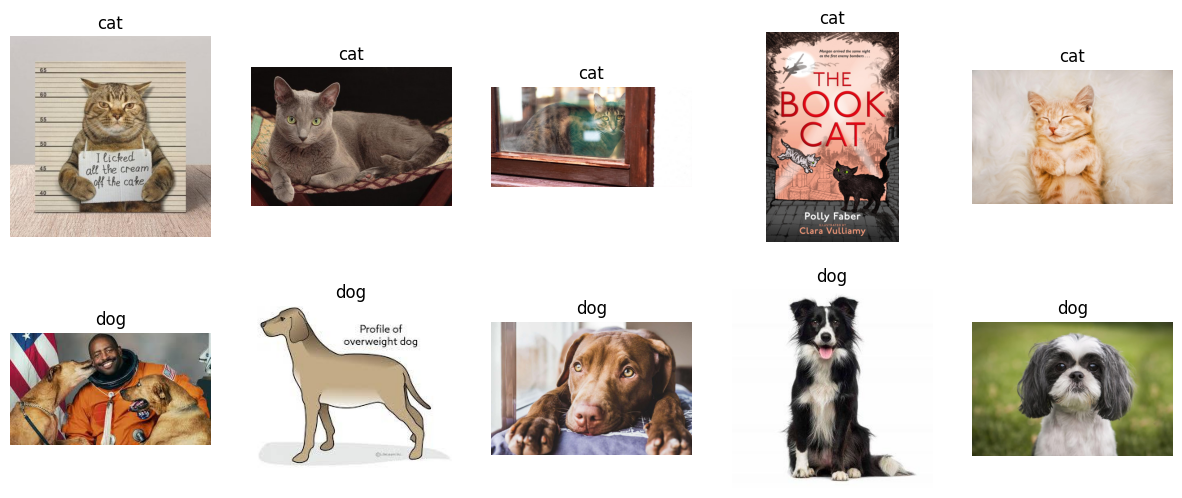

In [5]:
# Display the first 5 images of cats and dogs in 2 rows
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    imgcat = mpimg.imread(pathcats + '/' + cats[i])
    axs[0, i].imshow(imgcat)
    axs[0, i].axis('off')
    axs[0, i].set_title('cat')
    imgdog = mpimg.imread(pathdogs + '/' + dogs[i])
    axs[1, i].imshow(imgdog)
    axs[1, i].axis('off')
    axs[1, i].set_title('dog')


In [6]:
# Perform 80/20 split of each dataset 
from sklearn.model_selection import train_test_split

traincats, testcats = train_test_split(cats, test_size=0.2)
traindogs, testdogs = train_test_split(dogs, test_size=0.2)

Text(0.5, 1.0, 'Number of dogs images')

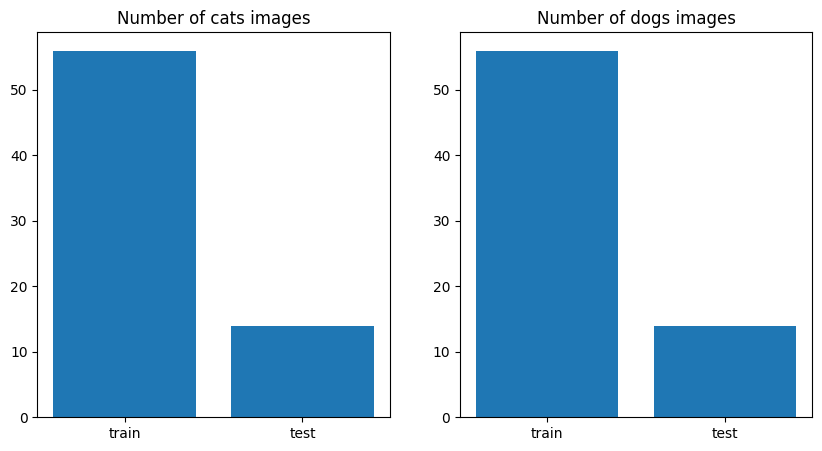

In [7]:
# Plot bar grpahs of the number of images in each dataset
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(['train', 'test'], [len(traincats), len(testcats)])
axs[0].set_title('Number of cats images')
axs[1].bar(['train', 'test'], [len(traindogs), len(testdogs)])
axs[1].set_title('Number of dogs images')


In [8]:
%pip install augly


Note: you may need to restart the kernel to use updated packages.


In [86]:
import augly.image as imaugs
import random
import os

def augment_images(train_images, input_path, output_path):
    # Create a list of augmentation functions from augly.image
    augmentation_ops = [
        imaugs.blur,
        imaugs.crop,
        imaugs.rotate,
        imaugs.scale,
        imaugs.random_noise,
        imaugs.grayscale,
        imaugs.opacity,
        imaugs.brightness,
        imaugs.contrast,
        imaugs.pixelization,
        imaugs.pad_square,
        imaugs.sharpen,
        imaugs.skew,
        imaugs.scale,
    ]

    # Ensure the output directory exists
    # Clear the output directory if it exists, create it if it doesn't
    if os.path.exists(output_path):
        for file in os.listdir(output_path):
            file_path = os.path.join(output_path, file)
            if os.path.isfile(file_path):
                os.remove(file_path)
    os.makedirs(output_path)

    # Iterate over training images
    for k in range(2):
        for filename in train_images:
            input_file = os.path.join(input_path, filename)
            # Randomly select three operations
            ops = random.sample(augmentation_ops, 3)
            augmented_image = input_file
            print(f"Applying {ops} to {filename}")
            i = 0
            for op in ops:
                output_file = os.path.join(output_path, f"{op.__name__}{k}_{filename}")
                augmented_image = op(augmented_image, output_file)
                i += 1
                if i < 3:
                    os.remove(output_file)

# Use the function with traincats



In [83]:
augment_images(traincats, pathcats, 'augmented_cats')

Applying [<function scale at 0x120bfdc60>, <function pixelization at 0x120bfd800>, <function rotate at 0x120bfda80>] to cat_147.jpg
Applying [<function skew at 0x120bfdee0>, <function scale at 0x120bfdc60>, <function sharpen at 0x120bfdda0>] to cat_468.jpg
Applying [<function opacity at 0x120bfd080>, <function blur at 0x120bfc4a0>, <function rotate at 0x120bfda80>] to cat_575.jpg
Applying [<function scale at 0x120bfdc60>, <function sharpen at 0x120bfdda0>, <function crop at 0x120bfcae0>] to cat_430.jpg
Applying [<function crop at 0x120bfcae0>, <function brightness at 0x120bfc5e0>, <function contrast at 0x120bfc9a0>] to cat_504.jpg
Applying [<function skew at 0x120bfdee0>, <function grayscale at 0x120bfcd60>, <function scale at 0x120bfdc60>] to cat_433.jpg
Applying [<function skew at 0x120bfdee0>, <function random_noise at 0x120bfd8a0>, <function pad_square at 0x120bfd620>] to cat_586.jpg
Applying [<function random_noise at 0x120bfd8a0>, <function blur at 0x120bfc4a0>, <function sharpen

In [85]:
#check the size of augmented images
augmented_cats = os.listdir('augmented_cats')
print('Number of augmented cats:', len(augmented_cats))

Number of augmented cats: 112


In [87]:
augment_images(traindogs, pathdogs, 'augmented_dogs')


Applying [<function pixelization at 0x120bfd800>, <function random_noise at 0x120bfd8a0>, <function sharpen at 0x120bfdda0>] to dog_191.jpg
Applying [<function grayscale at 0x120bfcd60>, <function rotate at 0x120bfda80>, <function skew at 0x120bfdee0>] to dog_213.jpg
Applying [<function rotate at 0x120bfda80>, <function opacity at 0x120bfd080>, <function pad_square at 0x120bfd620>] to dog_147.jpg
Applying [<function grayscale at 0x120bfcd60>, <function scale at 0x120bfdc60>, <function scale at 0x120bfdc60>] to dog_464.jpg
Applying [<function opacity at 0x120bfd080>, <function grayscale at 0x120bfcd60>, <function brightness at 0x120bfc5e0>] to dog_229.jpg
Applying [<function brightness at 0x120bfc5e0>, <function contrast at 0x120bfc9a0>, <function crop at 0x120bfcae0>] to dog_236.jpg
Applying [<function scale at 0x120bfdc60>, <function contrast at 0x120bfc9a0>, <function brightness at 0x120bfc5e0>] to dog_59.jpg
Applying [<function contrast at 0x120bfc9a0>, <function brightness at 0x120

In [88]:
augmented_dogs = os.listdir('augmented_dogs')
print('Number of augmented cats:', len(augmented_cats))

Number of augmented cats: 112
